
## AdaDelta

* The delta part is instead of learning rate adadelta uses the delta of weights/coordinates between updates

* In addition to adagrad, it uses this delta feature for its updates

* Adadelta involves two things:
    1. State variables to store leaky averages of gradients
    2. Delta to store leaky average of weight changes

## Algorithm

$$ s_t = \gamma s_{t-1} + (1 - \gamma)\nabla_t^2 $$
$$ w_t = w_{t-1} - \frac{\sqrt{\delta x_{t-1} + \epsilon}} {\sqrt{s_t + \epsilon}} \nabla_t $$

where the delta is leaky avg of weights

$$ \delta x_t = \gamma \delta x_{t-1} + (1 - \gamma)\nabla_t^2 $$ 

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [13]:
f = lambda x1, x2 : 0.1*x1**2 + 2*x2**2
gradf = lambda x1, x2 : (0.2*x1, 4*x2)

def adadelta_calc(x1, x2, s1, s2, del_x1, del_x2):
    eps = 1e-06; gamma = 0.5
    (g1, g2) = gradf(x1, x2)
    s1 = gamma*s1 + (1 - gamma)*(g1**2)
    s2 = gamma*s2 + (1 - gamma)*(g2**2)

    x1 -= tf.math.sqrt(del_x1 + eps)/tf.math.sqrt(s1 + eps)* g1
    x2 -= tf.math.sqrt(del_x2 + eps)/tf.math.sqrt(s2 + eps)* g2
    
    del_x1 = gamma*del_x1 + (1 - gamma)*g1**2
    del_x2 = gamma*del_x2 + (1 - gamma)*g2**2

    return x1, x2, s1, s2, del_x1, del_x2

def adadelta_desc(init_val):
    x1, x2 = init_val
    s1, s2 = tf.Variable(tf.zeros(1)), tf.Variable(tf.zeros(1))
    del_x1, del_x2 = tf.Variable(tf.zeros(1)), tf.Variable(tf.zeros(1))
    results = [(x1, x2)]
    for i in range(200):
        x1, x2, s1, s2, del_x1, del_x2 = adadelta_calc(x1, x2, s1, s2, del_x1, del_x2)
        results.append((x1, x2))
    return results

In [14]:
res_low_lr = adadelta_desc(init_val = [-15, -12])
res_high_lr = adadelta_desc(init_val = [-15, -12])

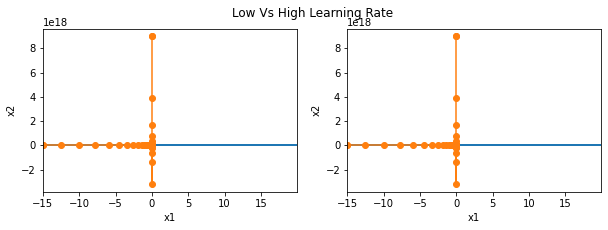

In [15]:
def plot_gd_update(results):
    plt.figure(figsize=(10, 3))
    plt.suptitle("Low Vs High Learning Rate")
    subplots = [121, 122]
    for result, subplot in zip(results, subplots):
        plt.subplot(subplot)
        x1, x2 = tf.meshgrid(tf.range(-15, 20.0, 0.1),
                          tf.range(-15.0, 20.0, 0.1))
        plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')
        plt.plot(*zip(*result), '-o', color='#ff7f0e')
        plt.xlabel('x1')
        plt.ylabel('x2')

plot_gd_update([res_low_lr, res_high_lr])